### Approximate SVB's period from theory and model output

1. Back of the envelope calculation of the theoretical period of the seiche in SVB according to the Handbook of Coastal and Ocean Engineering, Chapter 11 Seiches and Harbor Oscillations by Alexander B. Rabinovich.

Semi-circle or ellipsoid with exponentially decaying bottom or paraboloidal bottom profile:

$$T_0=2.22\left[\frac{2L}{(gh)^{1/2}}\right],$$

where $L$ is the length from mouth to wall, and $h$ is the depth at the mouth.

2. From model output, we look at stations along the bay's coast and get a period from ssh timeseies.

3. Attenuation of ssh at those same stations

In [1]:
import cmocean as cmo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset
import seaborn as sns

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
# Load output
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
ds = open_mdsdataset(outdir, prefix=['eta'])

In [4]:
# Load grid variables and mask
LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360

nx = len(lon)
ny = len(lat)

# centers mask
hFacC = ds['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
depth = ds['Depth'][:]

#### How do you choose where the mouth is?

**1st option** Approximate bay to red circle. Half circle would be at blue line and length from mouth to wall would be perpendicular line from blue line (touching 100 m isobath) to coast (yellow line)

Contours at 0, 50, 100, 150, 200 m (dark to light).

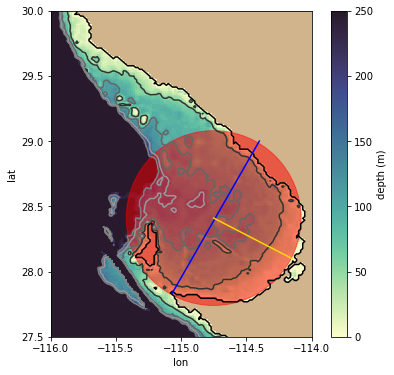

In [5]:
# Plot bay and approximate distances and reference circle
fig, (ax1) = plt.subplots(1,1,figsize=(7,6), sharey=True)
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, np.ma.masked_array(depth, mask=mask[0,:,:]), cmap=cmo.cm.deep, vmin=0, vmax=250)
plt.colorbar(pc1, ax=ax1, label='depth (m)')
ax1.contour(lon,lat,depth,levels=[0,50,100,150,200], colors=['k','0.2','0.4','0.6','0.5','0.5'])

ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_aspect(1)
ax1.set_xlim([-116.0,-114])
ax1.set_ylim([27.5,30.0])
ax1.set_xticks([-116,-115.5,-115,-114.5,-114])

Drawing_colored_circle = plt.Circle((-114.75, 28.41), 0.67, alpha=0.5, color='red')
ax1.add_artist( Drawing_colored_circle )

ax1.plot([-115.07,-114.4],[27.83,29],color='blue')
ax1.plot([-114.75,-114.15],[28.41,28.1],color='gold')

plt.show()

In [6]:
# Distance along the coast (haversine)
def distance(lat1,lon1,lat2,lon2):
    '''Distance using Haversine formula'''
    r = 6371 #radius of Earth (KM)
    p = np.pi/180  #Pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p)*np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p)) / 2
    d = 2 * r * np.arcsin(np.sqrt(a)) #2*R*asin In km
    return d

In [7]:
lon1 = -114.75
lat1 = 28.41
lon2 = -114.15
lat2 = 28.1
L = 1000*distance(lat1,lon1, lat2, lon2)
print('L = %1.1f m' %L)

L = 68130.9 m


In [8]:
h = 100
g = 9.81

To = 2.22*((2*L)/((g*h)**(1/2)))
print('With h = %1.1f m, g = %1.1f m/s^2, L=%1.1f m the approximate period is To=%1.2f hr' %(h,g,L,To/3600))

With h = 100.0 m, g = 9.8 m/s^2, L=68130.9 m the approximate period is To=2.68 hr


Which gives an equivalent frequency of 24/2.68 hr = 8.95 cpd. Too high.

But from SSH output we see that length of the seiche is a lot longer than the yellow line above:

<img src="high_phase_SVB.png" alt="high phase" style="width: 300px;"/>
<img src="low_phase_SVB.png" alt="low phase" style="width: 300px;"/>


So the effective length of the bay should be something closer to the next map.

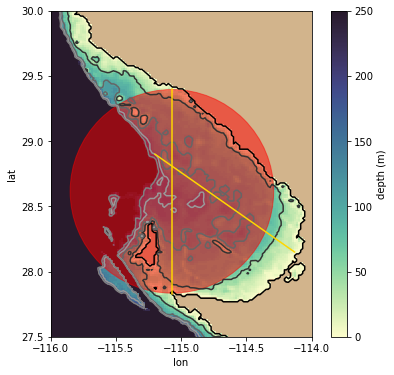

In [9]:
fig, (ax1) = plt.subplots(1,1,figsize=(7,6), sharey=True)
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, np.ma.masked_array(depth, mask=mask[0,:,:]), cmap=cmo.cm.deep, vmin=0, vmax=250)
plt.colorbar(pc1, ax=ax1, label='depth (m)')
ax1.contour(lon,lat,depth,levels=[0,50,100,150,200], colors=['k','0.2','0.4','0.6','0.5','0.5'])

ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_aspect(1)
ax1.set_xlim([-116.0,-114])
ax1.set_ylim([27.5,30.0])
ax1.set_xticks([-116,-115.5,-115,-114.5,-114])

Drawing_colored_circle = plt.Circle((-115.07, 28.615), 0.78, alpha=0.5, color='red')
ax1.add_artist( Drawing_colored_circle )

ax1.plot([-115.07,-115.07],[27.83,29.4],color='gold')
ax1.plot([-115.2,-114.13],[28.9,28.15],color='gold')

plt.show()

In [10]:
lon1 = -115.2
lat1 = 28.9
lon2 = -114.13
lat2 = 28.15
L2 = 1000*distance(lat1,lon1, lat2, lon2)
print('L2 = %1.1f m' %L2)

L2 = 133724.5 m


In [11]:
h2 = 90 # mean depth of transect
g = 9.81

To2 = 2.22*((2*L2)/((g*h2)**(1/2)))
print('With h2 = %1.1f m, g = %1.1f m/s^2, L2=%1.1f m the approximate period is To2=%1.2f hr' %(h2,g,L2,To2/3600))

With h2 = 90.0 m, g = 9.8 m/s^2, L2=133724.5 m the approximate period is To2=5.55 hr


In [12]:
h3 = 150 # max depth of transect
g = 9.81

To3 = 2.22*((2*L2)/((g*h3)**(1/2)))
print('With h3 = %1.1f m, g = %1.1f m/s^2, L2=%1.1f m the approximate period is To3=%1.2f hr' %(h3,g,L2,To3/3600))

With h3 = 150.0 m, g = 9.8 m/s^2, L2=133724.5 m the approximate period is To3=4.30 hr


What depth to choose? (See depth profile along transect below)

If I use the mean depth (90 m) I get a period of 5.5 hr.

If I use the max depth (150 m) I get a period of 4.30 hr.

These give equivalent frequencies of 24/5.5 hr = 4.36 cpd and 24/4.3 hr = 5.58 cpd.

Considering that the seiche is more complicated than just going up and down at the SE corner of the bay (it also moves around from the SW corner to the NE corner) this pretty good, isn't it?

### Depth profile in bay along length

In [13]:
print('%1.2f' %lon[435])
print('%1.2f' %lat[139])

-115.21
28.90


In [14]:
print('%1.2f' %lon[504])
print('%1.2f' %lat[84])

-114.13
28.15


84.01


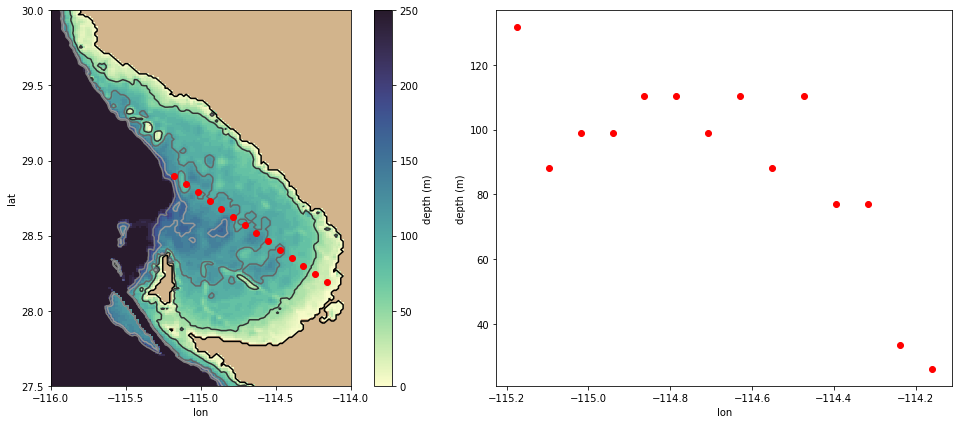

In [15]:
# Slope:
stepy = -4
stepx = 5
x1 = 437
y1 = 139
x2 = 504
y2 = 84

mean_depth = 0

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, np.ma.masked_array(depth, mask=mask[0,:,:]), cmap=cmo.cm.deep, vmin=0, vmax=250)
plt.colorbar(pc1, ax=ax1, label='depth (m)')
ax1.contour(lon,lat,depth,levels=[0,50,100,150,200], colors=['k','0.2','0.4','0.6','0.5','0.5'])

ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_aspect(1)
ax1.set_xlim([-116.0,-114])
ax1.set_ylim([27.5,30.0])
ax1.set_xticks([-116,-115.5,-115,-114.5,-114])

for ii in range(14):
    xx = x1+(stepx*ii)
    yy = y1+(stepy*ii)
    ax2.plot(lon[xx],depth[yy,xx],'ro')
    mean_depth = mean_depth+depth[yy,xx]
    ax1.plot(lon[xx], lat[yy], 'ro')
ax2.set_ylabel('depth (m)')
ax2.set_xlabel('lon')

mean_depth = mean_depth/15
print('%1.2f' %mean_depth)
plt.tight_layout()
plt.show()


### Appendix: Seiche evolution during one period

What does the seiche look like?

4.0 m
6.0 m
6.0 m
8.0 m
2.0 m
10.0 m
10.0 m
4.0 m


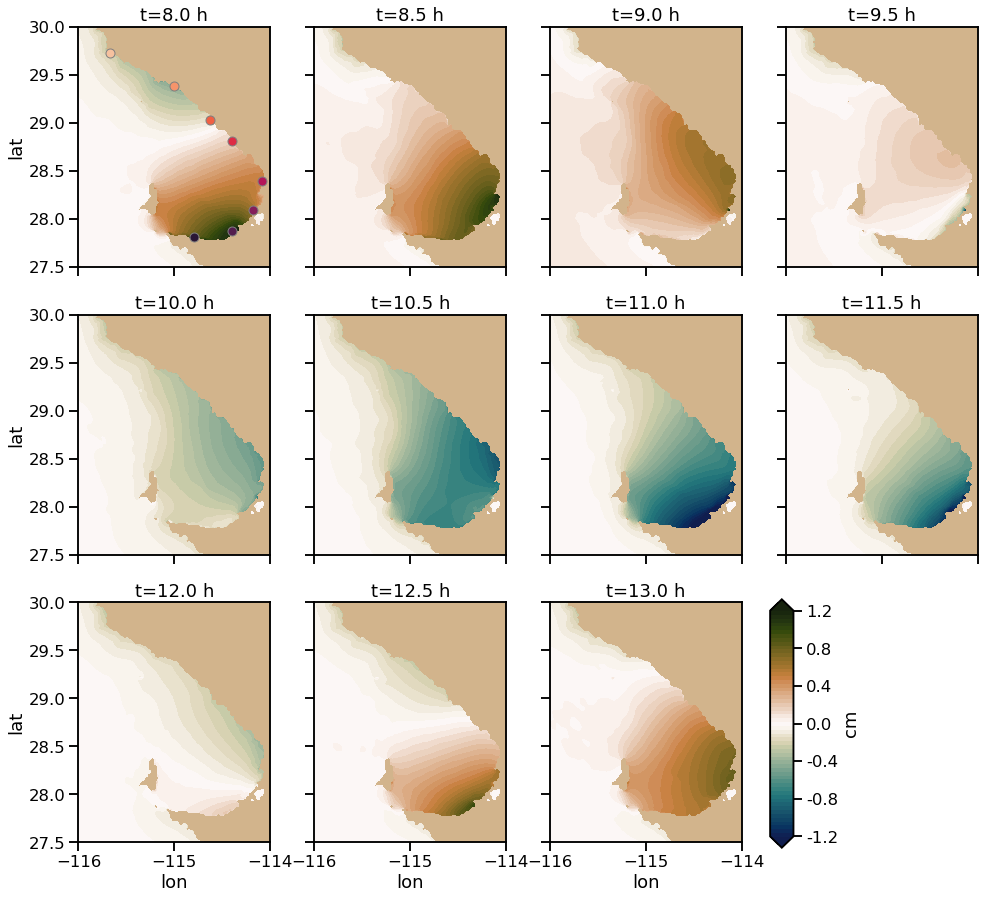

In [16]:
sns.set_context('talk')
sns.set_palette('rocket', 8)
cmap=cmo.cm.tarn_r
time = np.arange(0,720)*600
vmin = -1.2
vmax = 1.2
levs = np.linspace(vmin,vmax,60)
lon_inds = [428+33, 428+59, 428+73,429+78, 428+59, 387+85,428+20,405 ]
lat_inds = [59, 61+3,80,102,133, 149, 175,200]

fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12))=plt.subplots(3, 4, 
                                                                            figsize=(16.2,15),
                                                                            sharey=True,
                                                                            sharex=True)
axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]
for tt, ax in zip(range(48, 80, 3),axs):
    ax.set_xlim(-116, -114)
    ax.set_ylim(27.5, 30)
    ax.set_facecolor('tan')

    eta = ds['ETAN'][tt,:,:]
    pc = ax.contourf(lon,lat, 
                     np.ma.masked_array(eta*100,mask=mask[0,:,:]),
                     levels=levs,
                     cmap=cmap, vmin=vmin, vmax=vmax, extend='both')
    ax.set_title('t=%1.1f h'%(time[tt]/3600))
    ax.set_aspect(1)

cbar_ax = fig.add_axes([0.72, 0.12, 0.02, 0.23]) 
cb = fig.colorbar(pc,
                  cax=cbar_ax, orientation='vertical', 
                  format='%1.1f', label='cm',
                  extend='both', ticks=[-1.2,-0.8,-0.4,0,0.4,0.8,1.2])

for jj in range(len(lon_inds)):
    ax1.plot(lon[lon_inds[jj]],lat[lat_inds[jj]],'o', markeredgecolor='0.5')
    
# Remove ax12 (this is a lazy way to do it. Use gridspec?)
ax12.xaxis.set_visible(False)
ax12.yaxis.set_visible(False)
for spine in ['top', 'right', 'left', 'bottom']:
    ax12.spines[spine].set_visible(False)

# Check depths of ssh stations
for jj in range(len(lon_inds)):
    print('%1.1f m' %depth[lat_inds[jj], lon_inds[jj]])

for ax in [ax1, ax5, ax9]:
    ax.set_ylabel('lat')
for ax in [ax9, ax10, ax11]:
    ax.set_xlabel('lon')
    

Text(0, 0.5, '')

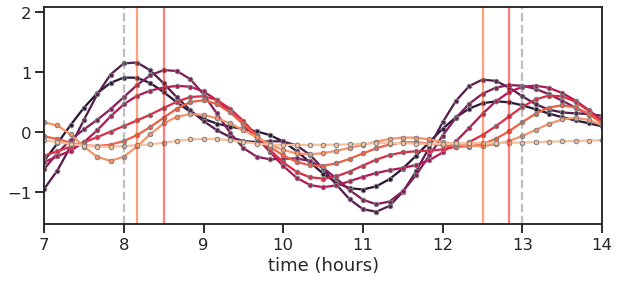

In [17]:
sns.set_style('ticks')
fig, ax1 = plt.subplots(1,1, figsize=(10,4))
for jj in range(len(lon_inds)):
    eta = ds['ETAN'][:288,lat_inds[jj],lon_inds[jj]]
    ax1.plot(time[:288]/3600,
             np.ma.masked_array(eta*100,mask=mask[0,lat_inds[jj],lon_inds[jj]]),
            '.-', markeredgecolor='0.5')
ax1.set_xlim(7,14)
ax1.axvline(8.0, color='0.5', linestyle='--', alpha=0.5)
ax1.axvline(13.0, color='0.5', linestyle='--', alpha=0.5)
ax1.axvline(8.16, color='orangered', linestyle='-', alpha=0.5)
ax1.axvline(12.5, color='orangered', linestyle='-', alpha=0.5)

ax1.axvline(8.5, color='red', linestyle='-', alpha=0.5)
ax1.axvline(12.83, color='red', linestyle='-', alpha=0.5)

ax1.set_xlabel('time (hours)')
ax1.set_ylabel('')

Dashed lines indicate the time period shown in the ssh contourf plots. Orange lines correspond to the max ssh at the second station (from SW to NE). The time between those two lines is 12.5-8.16 = 4.34 hr.

This gives an equivalent frequency of 24/4.34 hr = 5.5 cpd. There is a +/- of 0.16 hr (output resolution in time) and a +/- 0.2 cpd in freq. resolution.

Using next station (red vertical line):
12.83-8.5 = 4.33 hr ---> 5.54 cpd.



### Attenuation

to be continued...

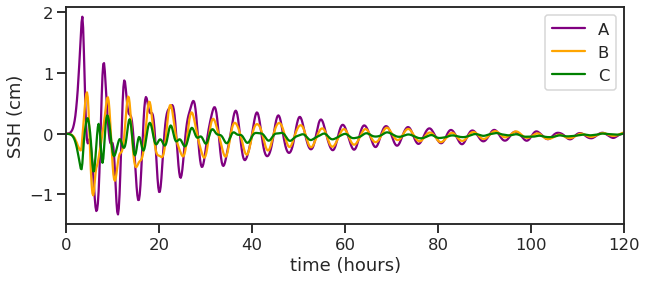

In [18]:
fig, ax1 = plt.subplots(1,1, figsize=(10,4))
eta = ds['ETAN'][:,lat_inds[1],lon_inds[1]]
eta2 = ds['ETAN'][:,lat_inds[4],lon_inds[4]]
eta3 = ds['ETAN'][:,lat_inds[6],lon_inds[6]]

ax1.plot(time[:]/3600,np.ma.masked_array(eta*100,mask=mask[0,lat_inds[1],lon_inds[1]]),'purple', label='A' )
ax1.plot(time[:]/3600,np.ma.masked_array(eta2*100,mask=mask[0,lat_inds[4],lon_inds[4]]),'orange', label='B')
ax1.plot(time[:]/3600,np.ma.masked_array(eta3*100,mask=mask[0,lat_inds[6],lon_inds[6]]),'green', label='C')

ax1.set_xlim(0,24*5)
ax1.set_xlabel('time (hours)')
ax1.set_ylabel('SSH (cm)')
ax1.legend()


In [19]:
# Load output Barotropic
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/02_SVB_barotropic_output/'
ds2 = open_mdsdataset(outdir2, prefix=['eta'])

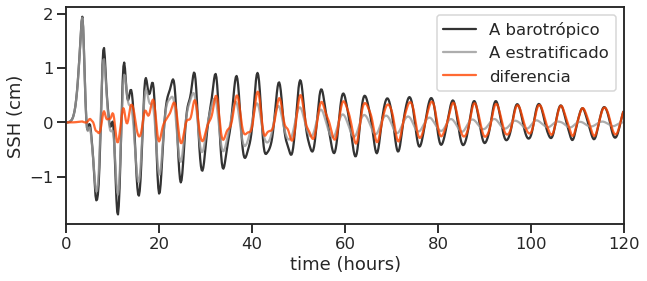

In [43]:
fig, ax1 = plt.subplots(1,1, figsize=(10,4))
etab = ds2['ETAN'][:,lat_inds[1],lon_inds[1]]
eta2b = ds2['ETAN'][:,lat_inds[4],lon_inds[4]]
eta3b = ds2['ETAN'][:,lat_inds[6],lon_inds[6]]

ax1.plot(time[:]/3600,np.ma.masked_array((etab)*100,mask=mask[0,lat_inds[1],lon_inds[1]]),'k', alpha=0.8, label='A barotrópico' )
ax1.plot(time[:]/3600,np.ma.masked_array((eta)*100,mask=mask[0,lat_inds[1],lon_inds[1]]),'0.6', alpha=0.8, label='A estratificado')
ax1.plot(time[:]/3600,(np.ma.masked_array((etab)*100,mask=mask[0,lat_inds[1],lon_inds[1]])-
         np.ma.masked_array((eta)*100,mask=mask[0,lat_inds[1],lon_inds[1]])),
         'orangered', label='diferencia', alpha=0.8)

ax1.set_xlim(0,24*5)
ax1.set_xlabel('time (hours)')
ax1.set_ylabel('SSH (cm)')
ax1.legend()